In [3]:
import pandas as pd
df = pd.read_csv("hotel_bookings.csv")
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [4]:
print("Column Names:\n", df.columns)

# Display column names with their data types
print("\nColumn Names and Data Types:\n", df.dtypes)

Column Names:
 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Column Names and Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number  

/var/folders/6_/rk5qm4qs56dftm5mbtjfpf5h0000gn/T/ipykernel_3174/1600708837.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["arrival_date"] = pd.to_datetime(df["arrival_date_year"].astype(str) + "-" + df["arrival_date_month"])


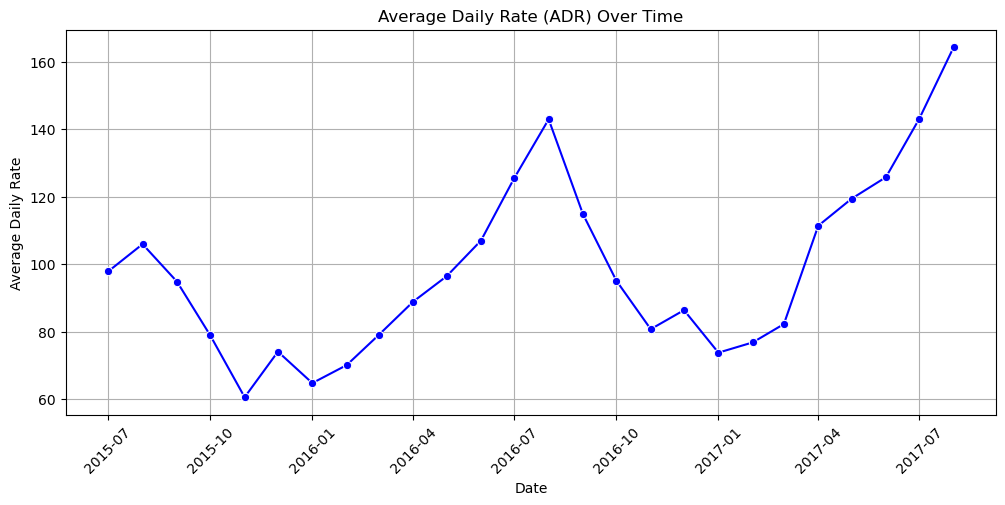

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert reservation_status_date to datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

# Aggregate ADR (revenue per booking) by year and month
df["arrival_date"] = pd.to_datetime(df["arrival_date_year"].astype(str) + "-" + df["arrival_date_month"])

# Group by arrival_date and get the mean ADR
revenue_trend = df.groupby("arrival_date")["adr"].mean()

# Plot the revenue trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=revenue_trend, marker="o", color="b")
plt.title("Average Daily Rate (ADR) Over Time")
plt.xlabel("Date")
plt.ylabel("Average Daily Rate")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [6]:
# Calculate cancellation rate
cancellation_rate = (df["is_canceled"].sum() / len(df)) * 100

print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Cancellation Rate: 37.04%


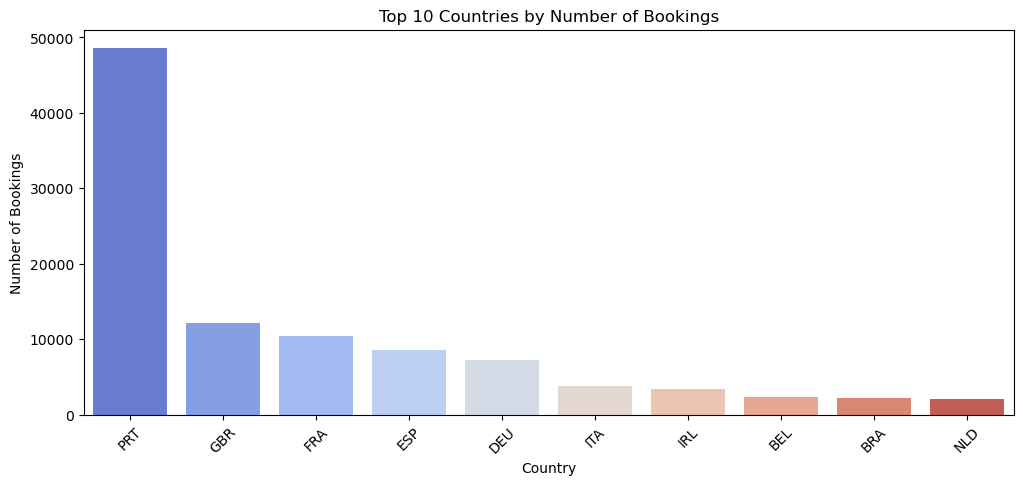

In [7]:
# Count bookings per country
country_counts = df["country"].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title("Top 10 Countries by Number of Bookings")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


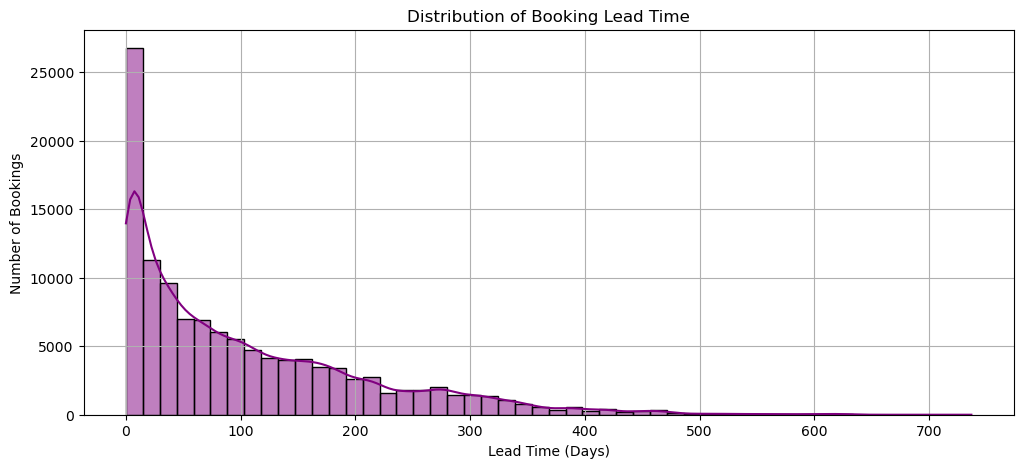

In [8]:
# Plot histogram of lead times
plt.figure(figsize=(12, 5))
sns.histplot(df["lead_time"], bins=50, kde=True, color="purple")
plt.title("Distribution of Booking Lead Time")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.grid()
plt.show()


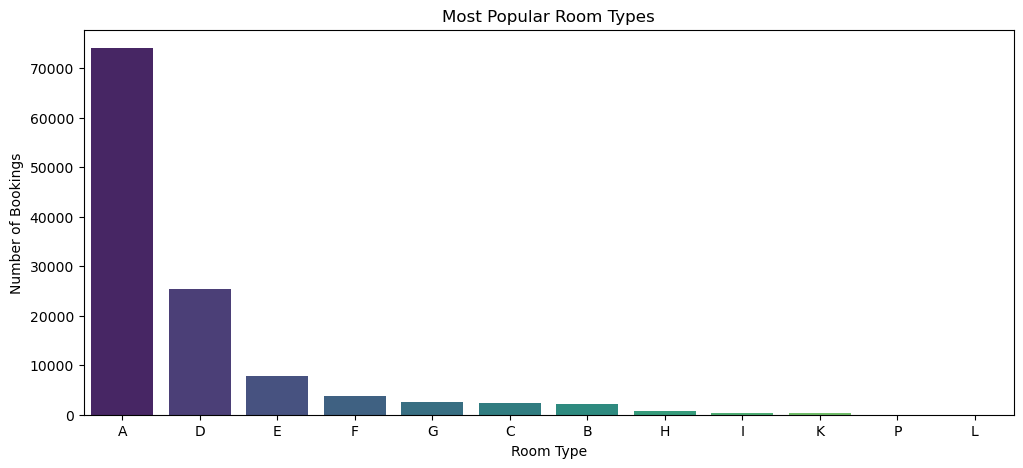

In [9]:
# Most assigned room types
room_counts = df["assigned_room_type"].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=room_counts.index, y=room_counts.values, palette="viridis")
plt.title("Most Popular Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")
plt.show()
